# **Experiment-4: Implement different pre-processing operation on given dataset.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**1. Data Loading and Initial Exploration**

In [ ]:
# Load dataset
df = pd.read_csv("AB_NYC_2019.csv")


In [ ]:
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset Shape: (48895, 16)
Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1        

In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review      

In [ ]:
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)

Missing values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Option 1: Drop missing values
df_cleaned = df.dropna()
print(f"\nShape after dropping all missing values: {df_cleaned.shape}")


Shape after dropping all missing values: (38821, 16)


In [ ]:
# Option 2: Fill missing values appropriately
print("\nFilling missing values with appropriate methods:")
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)
df['last_review'].fillna('Not Available', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)


Filling missing values with appropriate methods:


In [ ]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())
print("Duplicate IDs:", df['id'].duplicated().sum())

Number of duplicate rows: 0
Duplicate IDs: 0


In [ ]:
# Drop duplicates
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape} (removed {initial_shape[0] - df.shape[0]} duplicates)")

Shape after removing duplicates: (48895, 16) (removed 0 duplicates)


In [ ]:
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [ ]:
# Extract useful features from last_review
df['last_review_year'] = df['last_review'].dt.year
df['last_review_month'] = df['last_review'].dt.month
df['last_review_day'] = df['last_review'].dt.day
df['last_review_weekday'] = df['last_review'].dt.day_name()

In [ ]:
# Fill NaN values in new datetime features
df['last_review_year'].fillna(0, inplace=True)
df['last_review_month'].fillna(0, inplace=True)
df['last_review_day'].fillna(0, inplace=True)
df['last_review_weekday'].fillna('Unknown', inplace=True)

In [ ]:
print("Date features created:")
print(df[['last_review', 'last_review_year', 'last_review_month', 'last_review_day', 'last_review_weekday']].head())

Date features created:
  last_review  last_review_year  last_review_month  last_review_day  \
0  2018-10-19            2018.0               10.0             19.0   
1  2019-05-21            2019.0                5.0             21.0   
2         NaT               0.0                0.0              0.0   
3  2019-07-05            2019.0                7.0              5.0   
4  2018-11-19            2018.0               11.0             19.0   

  last_review_weekday  
0              Friday  
1             Tuesday  
2             Unknown  
3              Friday  
4              Monday  


In [ ]:
print("Original categorical columns:")
print("neighbourhood_group unique values:", df['neighbourhood_group'].unique())
print("room_type unique values:", df['room_type'].unique())

Original categorical columns:
neighbourhood_group unique values: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
room_type unique values: ['Private room' 'Entire home/apt' 'Shared room']


In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [ ]:
print(f"\nAfter one-hot encoding - Shape: {df_encoded.shape}")
encoded_cols = [col for col in df_encoded.columns if 'neighbourhood_group' in col or 'room_type' in col]
print(f"Encoded columns: {encoded_cols}")


After one-hot encoding - Shape: (48895, 24)
Encoded columns: ['neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Private room', 'room_type_Shared room']


In [ ]:
# Select numerical features for scaling
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                     'calculated_host_listings_count', 'availability_365']

In [ ]:
print("Original numerical features statistics:")
print(df[numerical_features].describe())

Original numerical features statistics:
              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       48895.000000   
mean     152.720687        7.029962          23.274466           1.090910   
std      240.154170       20.510550          44.550582           1.597283   
min        0.000000        1.000000           0.000000           0.000000   
25%       69.000000        1.000000           1.000000           0.040000   
50%      106.000000        3.000000           5.000000           0.370000   
75%      175.000000        5.000000          24.000000           1.580000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000

In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
print("\nAfter StandardScaler:")
print(df_scaled[numerical_features].describe())


After StandardScaler:
              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  4.889500e+04    4.889500e+04       4.889500e+04       4.889500e+04   
mean   3.720195e-17    1.104433e-17       1.860098e-17       4.650244e-18   
std    1.000010e+00    1.000010e+00       1.000010e+00       1.000010e+00   
min   -6.359342e-01   -2.939962e-01      -5.224332e-01      -6.829856e-01   
25%   -3.486158e-01   -2.939962e-01      -4.999866e-01      -6.579428e-01   
50%   -1.945465e-01   -1.964844e-01      -4.102001e-01      -4.513398e-01   
75%    9.277183e-02   -9.897262e-02       1.628580e-02       3.062045e-01   
max    4.100441e+01    6.060212e+01       1.359649e+01       3.594209e+01   

       calculated_host_listings_count  availability_365  
count                    4.889500e+04      48895.000000  
mean                    -1.860098e-17          0.000000  
std                      1.000010e+00          1.000010  
min                     -1.864514e-01         -0.85

In [ ]:
# Boxplot for price
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 0, 'Price ($)')

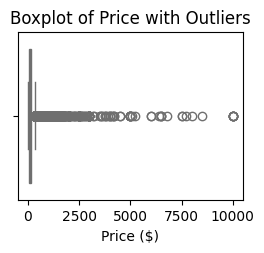

In [ ]:
plt.subplot(2, 2, 1)
sns.boxplot(x=df['price'], color="skyblue")
plt.title("Boxplot of Price with Outliers")
plt.xlabel("Price ($)")

Text(0.5, 0, 'Room Type')

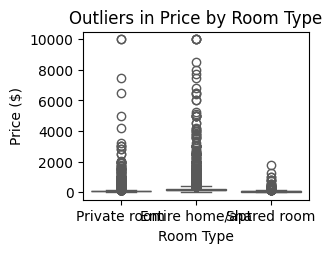

In [ ]:
# Boxplot by room type
plt.subplot(2, 2, 2)
sns.boxplot(x="room_type", y="price", data=df, palette="Set2")
plt.title("Outliers in Price by Room Type")
plt.ylabel("Price ($)")
plt.xlabel("Room Type")

Text(0, 0.5, 'Frequency')

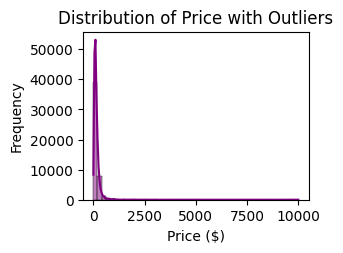

In [ ]:
# Histogram + KDE for price
plt.subplot(2, 2, 3)
sns.histplot(df['price'], bins=50, kde=True, color="purple")
plt.title("Distribution of Price with Outliers")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Price ($)')

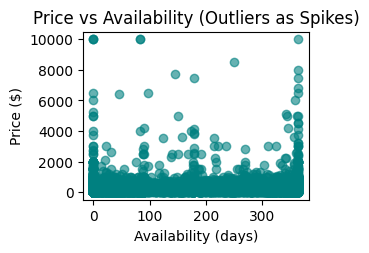

In [ ]:
# Scatter Plot (Price vs Availability)
plt.subplot(2, 2, 4)
plt.scatter(df['availability_365'], df['price'], alpha=0.6, color="teal")
plt.title("Price vs Availability (Outliers as Spikes)")
plt.xlabel("Availability (days)")
plt.ylabel("Price ($)")

In [ ]:
plt.tight_layout()
plt.savefig('outlier_detection_plots.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate IQR bounds for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
print(f"Price Statistics:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

Price Statistics:
Q1 (25th percentile): 69.00
Q3 (75th percentile): 175.00
IQR: 106.00
Lower bound: -90.00
Upper bound: 334.00


In [ ]:
# Identify outliers
price_outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nNumber of price outliers (IQR method): {len(price_outliers)}")
print(f"Percentage of outliers: {(len(price_outliers)/len(df))*100:.2f}%")


Number of price outliers (IQR method): 2972
Percentage of outliers: 6.08%


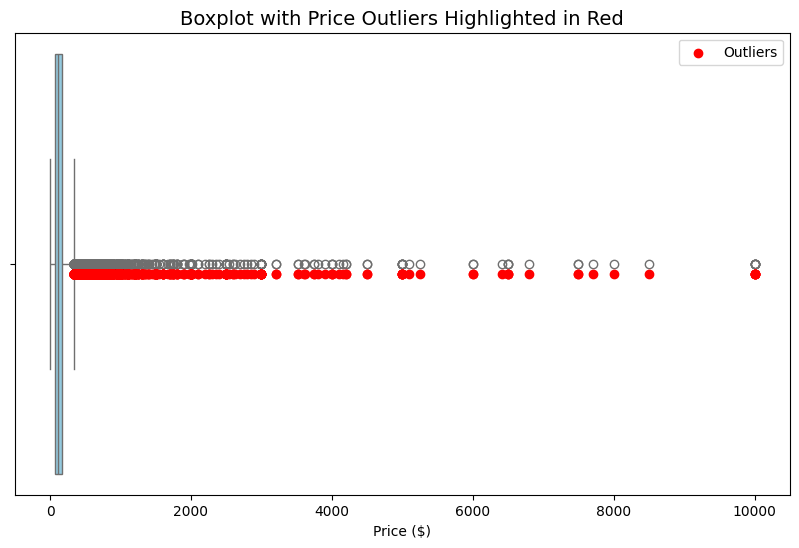

In [ ]:
# Highlight outliers on boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color="skyblue")
outlier_positions = [0.02] * len(price_outliers)
plt.scatter(price_outliers['price'], outlier_positions, color='red', label='Outliers', zorder=5)
plt.title("Boxplot with Price Outliers Highlighted in Red", fontsize=14)
plt.xlabel("Price ($)")
plt.legend()
plt.savefig('price_outliers_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Z-score calculation for price
z_scores = np.abs(stats.zscore(df['price'].dropna()))
price_outliers_z = df[z_scores > 3]
print(f"Outliers detected by Z-score (price): {len(price_outliers_z)}")

Outliers detected by Z-score (price): 388


In [ ]:
# Check minimum_nights for outliers
z_scores_nights = np.abs(stats.zscore(df['minimum_nights'].dropna()))
night_outliers_z = df[z_scores_nights > 3]
print(f"Outliers detected by Z-score (minimum_nights): {len(night_outliers_z)}")

Outliers detected by Z-score (minimum_nights): 327


In [ ]:
# Option 1: Remove outliers (using IQR for price)
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Shape after removing price outliers: {df_no_outliers.shape}")

Shape after removing price outliers: (45923, 20)


In [ ]:
# Option 2: Cap outliers (Winsorization)
df_capped = df.copy()
df_capped['price'] = np.where(df_capped['price'] > upper_bound, upper_bound,
                               np.where(df_capped['price'] < lower_bound, lower_bound,
                                        df_capped['price']))

In [ ]:
print(f"Price range after capping: {df_capped['price'].min():.2f} to {df_capped['price'].max():.2f}")

Price range after capping: 0.00 to 334.00


In [ ]:
# Option 3: Log transformation (to reduce skewness)
df['price_log'] = np.log1p(df['price'])
df['minimum_nights_log'] = np.log1p(df['minimum_nights'])

In [ ]:
print("\nAfter log transformation:")
print(df[['price', 'price_log', 'minimum_nights', 'minimum_nights_log']].describe())


After log transformation:
              price     price_log  minimum_nights  minimum_nights_log
count  48895.000000  48895.000000    48895.000000        48895.000000
mean     152.720687      4.736885        7.029962            1.499881
std      240.154170      0.695344       20.510550            0.869823
min        0.000000      0.000000        1.000000            0.693147
25%       69.000000      4.248495        1.000000            0.693147
50%      106.000000      4.672829        3.000000            1.386294
75%      175.000000      5.170484        5.000000            1.791759
max    10000.000000      9.210440     1250.000000            7.131699


In [ ]:
# Create new features
df['price_per_night'] = df['price'] / df['minimum_nights'].clip(lower=1)  # Avoid division by zero

In [ ]:
def categorize_price(price):
    if price <= 50:
        return 'Budget'
    elif price <= 100:
        return 'Affordable'
    elif price <= 200:
        return 'Moderate'
    else:
        return 'Expensive'

In [ ]:
df['price_category'] = df['price'].apply(categorize_price)

In [ ]:
def categorize_availability(days):
    if days == 0:
        return 'Not Available'
    elif days <= 30:
        return 'Low'
    elif days <= 180:
        return 'Medium'
    else:
        return 'High'

In [ ]:
df['availability_category'] = df['availability_365'].apply(categorize_availability)

In [ ]:
# Create host experience feature based on number of reviews
df['host_experience'] = pd.cut(df['number_of_reviews'],
                               bins=[-1, 0, 10, 50, float('inf')],
                               labels=['New', 'Experienced', 'Very Experienced', 'Super Host'])

In [ ]:
print("New features created:")
new_features = ['price_per_night', 'price_category', 'availability_category', 'host_experience']
print(df[new_features].head())

New features created:
   price_per_night price_category availability_category   host_experience
0            149.0       Moderate                  High       Experienced
1            225.0      Expensive                  High  Very Experienced
2             50.0       Moderate                  High               New
3             89.0     Affordable                  High        Super Host
4              8.0     Affordable         Not Available       Experienced


In [ ]:
print("\nPrice category distribution:")
print(df['price_category'].value_counts())


Price category distribution:
price_category
Affordable    17367
Moderate      16583
Expensive      8384
Budget         6561
Name: count, dtype: int64


In [ ]:
print("\nAvailability category distribution:")
print(df['availability_category'].value_counts())


Availability category distribution:
availability_category
Not Available    17533
High             14364
Medium           11724
Low               5274
Name: count, dtype: int64


In [ ]:
print("Final Dataset Shape:", df.shape)
print("\nFirst 3 rows of preprocessed data:")
print(df.head(3))

Final Dataset Shape: (48895, 26)

First 3 rows of preprocessed data:
     id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  ...  last_review_year  last_review_month last_review_day  \
0    149  ...            2018.0               10.0            19.0   
1    225  ...            2019.0                5.0            21.0   
2    150  ...               0.0                0.0             0.0   

   last_review_weekday  price_log  minimum_nights_log  price_per_nig

In [ ]:
print("\nDataset description (numerical features):")
print(df[numerical_features + ['price_log', 'minimum_nights_log', 'price_per_night']].describe())


Dataset description (numerical features):
              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       48895.000000   
mean     152.720687        7.029962          23.274466           1.090910   
std      240.154170       20.510550          44.550582           1.597283   
min        0.000000        1.000000           0.000000           0.000000   
25%       69.000000        1.000000           1.000000           0.040000   
50%      106.000000        3.000000           5.000000           0.370000   
75%      175.000000        5.000000          24.000000           1.580000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365     price_log  \
count                    48895.000000      48895.000000  48895.000000   
mean                         7.143982        112.781327      4.736885   
std                         32.952519       

In [ ]:
print("\nMissing values in final dataset:")
print(df.isnull().sum())



Missing values in final dataset:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
last_review_year                      0
last_review_month                     0
last_review_day                       0
last_review_weekday                   0
price_log                             0
minimum_nights_log                    0
price_per_night                       0
price_category                        0
availa

In [ ]:
print("\nData types:")
print(df.dtypes.value_counts())


Data types:
float64           9
object            8
int64             7
datetime64[ns]    1
category          1
Name: count, dtype: int64


In [ ]:
# Save the preprocessed dataset
df.to_csv('AB_NYC_2019_preprocessed.csv', index=False)
df_no_outliers.to_csv('AB_NYC_2019_no_outliers.csv', index=False)
df_capped.to_csv('AB_NYC_2019_capped.csv', index=False)
df_encoded.to_csv('AB_NYC_2019_encoded.csv', index=False)
df_scaled.to_csv('AB_NYC_2019_scaled.csv', index=False)

In [ ]:
print("Preprocessed datasets saved:")
print("1. AB_NYC_2019_preprocessed.csv - Full preprocessed dataset")
print("2. AB_NYC_2019_no_outliers.csv - Dataset with outliers removed")
print("3. AB_NYC_2019_capped.csv - Dataset with outliers capped")
print("4. AB_NYC_2019_encoded.csv - Dataset with categorical variables encoded")
print("5. AB_NYC_2019_scaled.csv - Dataset with scaled numerical features")

Preprocessed datasets saved:
1. AB_NYC_2019_preprocessed.csv - Full preprocessed dataset
2. AB_NYC_2019_no_outliers.csv - Dataset with outliers removed
3. AB_NYC_2019_capped.csv - Dataset with outliers capped
4. AB_NYC_2019_encoded.csv - Dataset with categorical variables encoded
5. AB_NYC_2019_scaled.csv - Dataset with scaled numerical features
